In [49]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [50]:
# mat = scipy.io.loadmat('EQ13_data.mat')
mat = scipy.io.loadmat('case1_random_forest.mat')

n1 = mat['n1_selected'] # reservoir density for node1
n2 = mat['n2_selected'] # reservoir desnity for node2


n_max = mat['n1_max']
g2 = mat['g2']
phi = mat['phi']
phi = np.reshape(phi,(32,1))
theta = mat['theta']
theta = np.reshape(theta,(32,1))
pop_sou = mat['ns']




In [51]:
#Select only 10 points for time multiplexing
for i in range(np.shape(n1)[0]):
  for j in range(np.shape(n1)[0]):
    n1[i,j] = n1[i,j][0][0:10]
    n2[i,j] = n2[i,j][0][0:10]

g2_re = []
ns = []
for i in range(np.shape(n1)[0]):
  for j in range(np.shape(n1)[0]):
    input = np.concatenate((np.reshape(n1[i,j],10), np.reshape(n2[i,j],10)))
    ns.append(input)
    g2_re.append(g2[i,j])

In [53]:
X = np.array(ns)
Y = np.reshape(g2_re,(1024,1))
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_c = np.reshape(pop_sou,(1024,1))
Y_c = np.reshape(g2_re,(1024,1))
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.25)

In [54]:
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)
Y_predict_RFR = regressor.predict(X_test)
MSE_reservoir = mean_squared_error(Y_test, Y_predict_RFR)

regressor_c = RandomForestRegressor()
regressor_c.fit(X_train_c, Y_train_c)
Y_predict_RFR_c = regressor_c.predict(X_test_c)
MSE_c = mean_squared_error(Y_test_c, Y_predict_RFR_c)
# print([MSE_reservoir, MSE_c])

C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [55]:
#Normalized mean squared error
Nomin = sum(np.square(np.reshape(Y_test,[len(Y_predict_RFR),]) - Y_predict_RFR))
denom = sum(np.square(np.reshape(Y_test,[len(Y_predict_RFR),]) + Y_predict_RFR))

Nomin_c = sum(np.square(np.reshape(Y_test_c,[len(Y_predict_RFR_c),]) - Y_predict_RFR_c))
denom_c = sum(np.square(np.reshape(Y_test_c,[len(Y_predict_RFR_c),]) + Y_predict_RFR_c))

print([Nomin/denom,Nomin_c/denom_c])

[0.0018154990864090747, 0.07500584699462375]


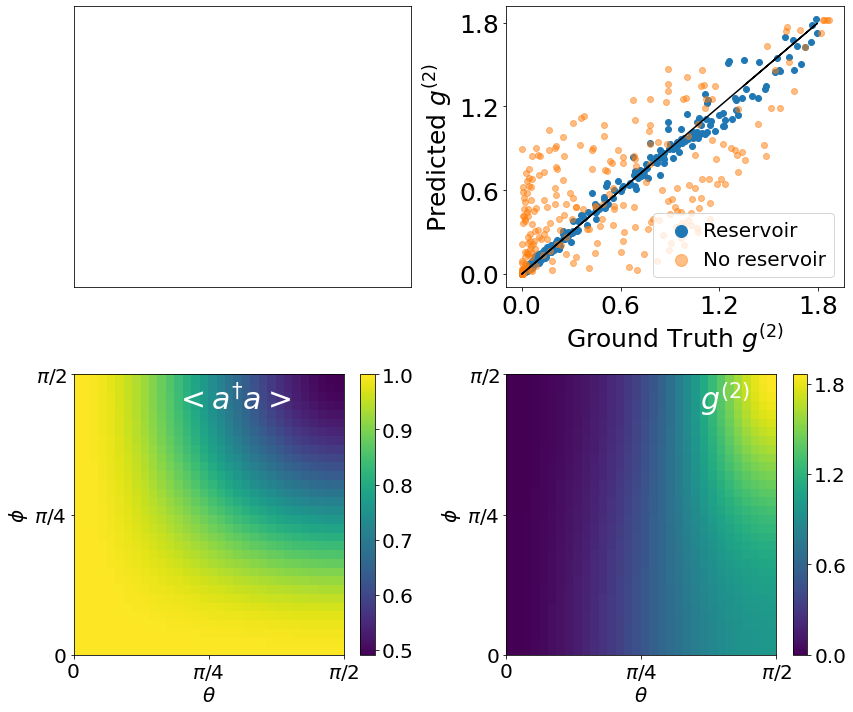

In [57]:
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
plt.xticks(ticks=[],fontsize=25)
plt.yticks(ticks=[],fontsize=25)

plt.subplot(2, 2, 2)
plt.scatter(Y_test, Y_predict_RFR, alpha=1, label="Reservoir")
plt.scatter(Y_test_c, Y_predict_RFR_c, alpha=0.5, label="No reservoir")
plt.plot(Y_test,Y_test,'k')
plt.xticks(ticks=[0,0.6,1.2,1.8],fontsize=25)
plt.yticks(ticks=[0,0.6,1.2,1.8],fontsize=25)
plt.xlabel("Ground Truth $g^{(2)}$",fontsize=25)
plt.ylabel("Predicted $g^{(2)}$",fontsize=25)
# plt.text(0.8, 0.5, 'Train score = 0.997',fontsize=20)
# plt.text(0.8, 0.3, 'Test score = 0.989',fontsize=20)
# plt.text(0.8, 0.1, 'MSE = 0.0003',fontsize=25)
# plt.text(0.8, 0.35, 'MSE = 0.1545',fontsize=25)
plt.legend(fontsize=20, handletextpad=0.1,loc=4,markerscale=2)

plt.subplot(2, 2, 3)
csfont = {'fontname':'Times New Roman'}
plt.pcolor(pop_sou)
plt.xticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
plt.yticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
plt.xlabel("$\\theta$",fontsize=20)
plt.ylabel("$\phi$",fontsize=20)
plt.text(12,28,'$<a^{\dagger}a>$',fontsize=30,color='white')
# plt.colorbar(fontsize=20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)

plt.subplot(2, 2, 4)
plt.pcolor(g2)
plt.xticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
plt.yticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
plt.xlabel("$\\theta$",fontsize=20)
plt.ylabel("$\phi$",fontsize=20)
plt.text(23,28,'$g^{(2)}$',fontsize=30,color='white')
cbar = plt.colorbar(ticks=[0,0.6,1.2,1.8])
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()